In [40]:
import pandas as pd 

In [41]:
df = pd.read_csv("SBAnational.csv")

/tmp/ipykernel_96423/3536806131.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SBAnational.csv")


In [42]:
df1 = df 
df2 = df
df3 = df
df4 = df
df5 = df

In [43]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [44]:
df.iloc[:,0]

0         1000014003
1         1000024006
2         1000034009
3         1000044001
4         1000054004
             ...    
899159    9995573004
899160    9995603000
899161    9995613003
899162    9995973006
899163    9996003010
Name: LoanNr_ChkDgt, Length: 899164, dtype: int64

In [45]:
df["ApprovalDate"].dtypes

dtype('O')

In [46]:

import seaborn as sns
import matplotlib.pyplot as plt

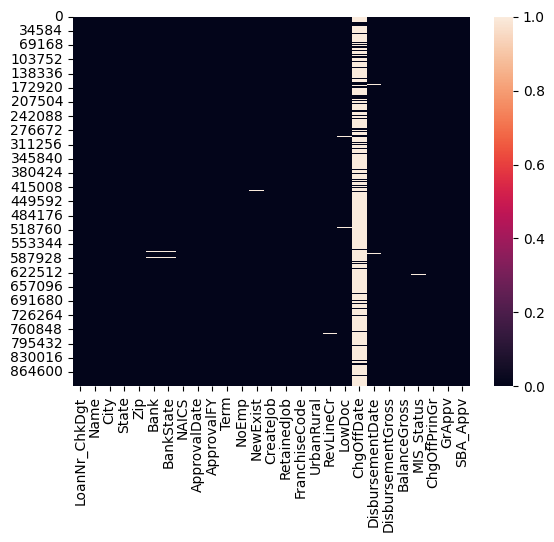

In [47]:
sns.heatmap(df.isna())
plt.show()

In [48]:
""" # pip install sweetviz
import sweetviz as sv
df = pd.read_csv('SBAnational.csv')
df['ApprovalFY'] = df['ApprovalFY'].replace('A', '', regex=True).astype(int) # parceque le ytpe de cette column est "mixed-integer'
report = sv.analyze(df)
report.show_html('report.html')  """

' # pip install sweetviz\nimport sweetviz as sv\ndf = pd.read_csv(\'SBAnational.csv\')\ndf[\'ApprovalFY\'] = df[\'ApprovalFY\'].replace(\'A\', \'\', regex=True).astype(int) # parceque le ytpe de cette column est "mixed-integer\'\nreport = sv.analyze(df)\nreport.show_html(\'report.html\')  '

<AxesSubplot: >

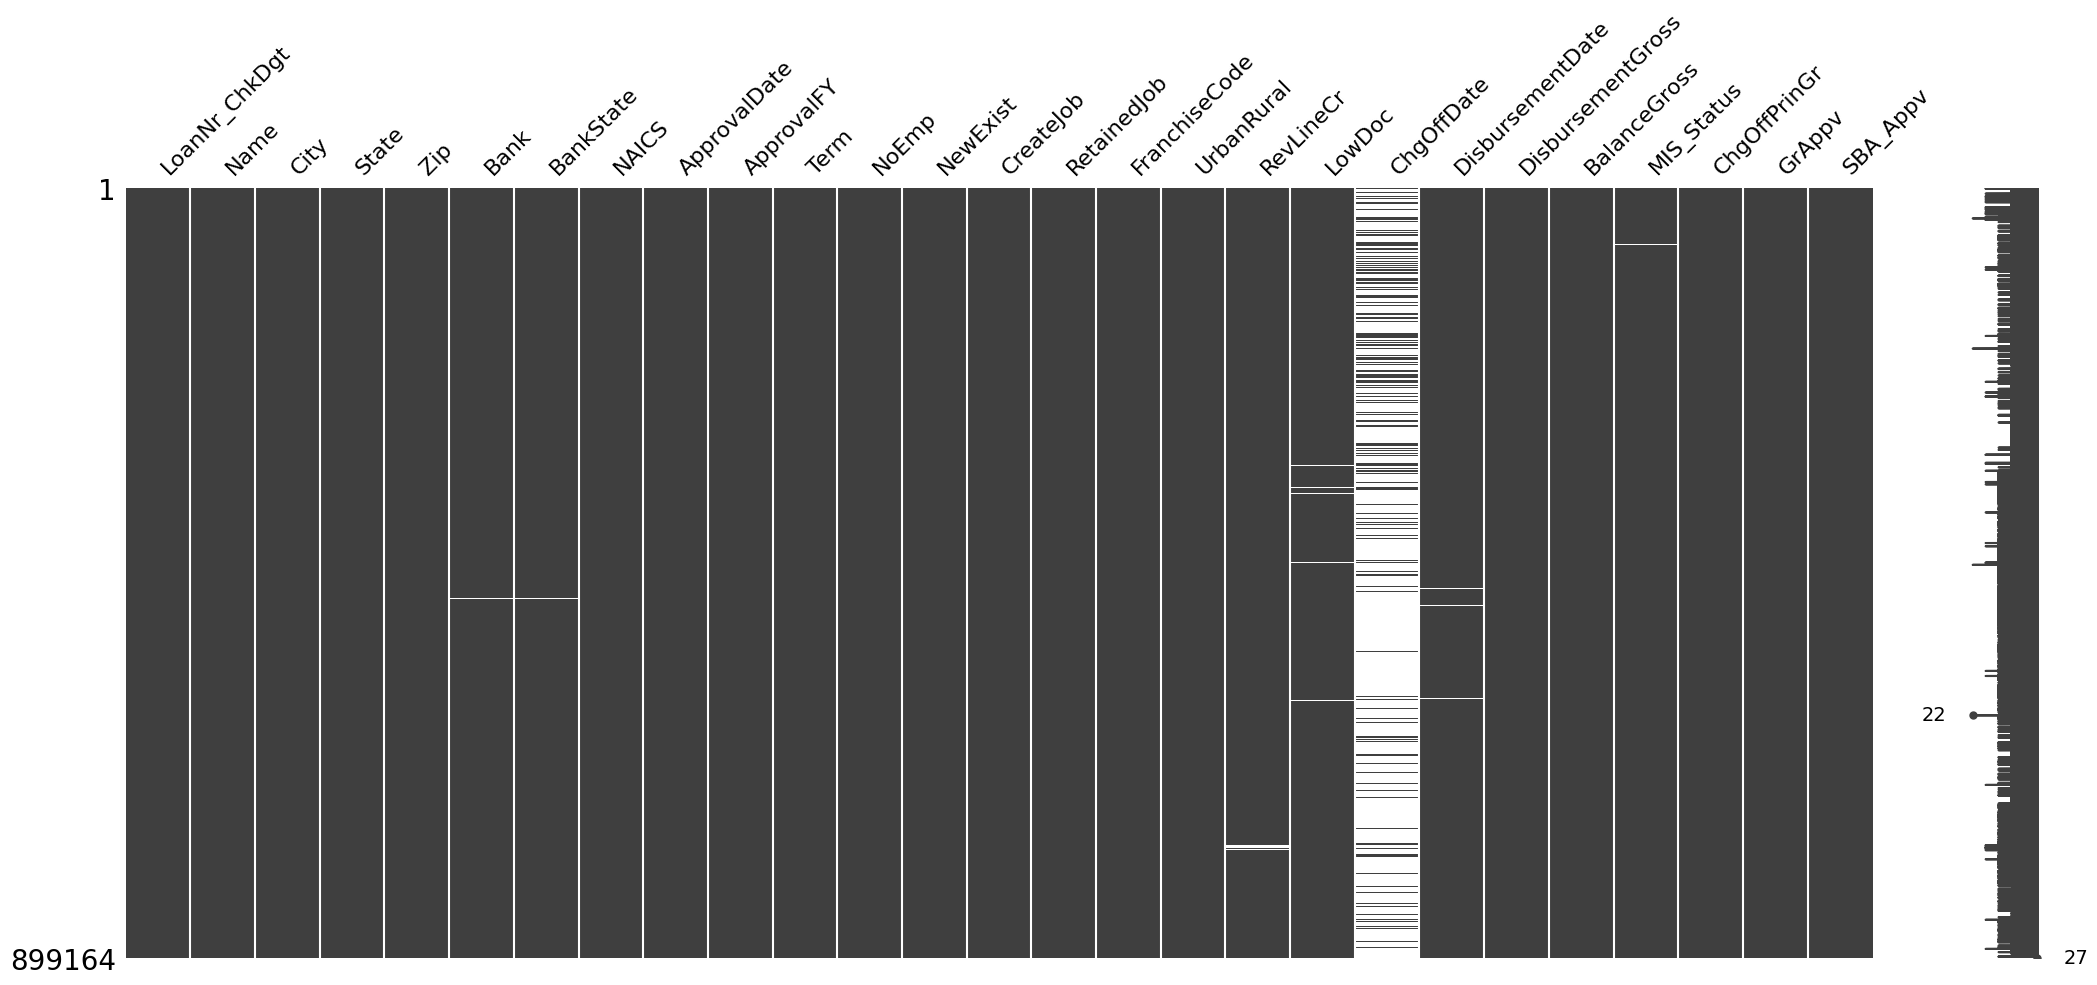

In [49]:
import pandas as pd
import missingno as msno

# Loading the dataset


# Visualize missing values as a matrix
msno.matrix(df)

<AxesSubplot: >

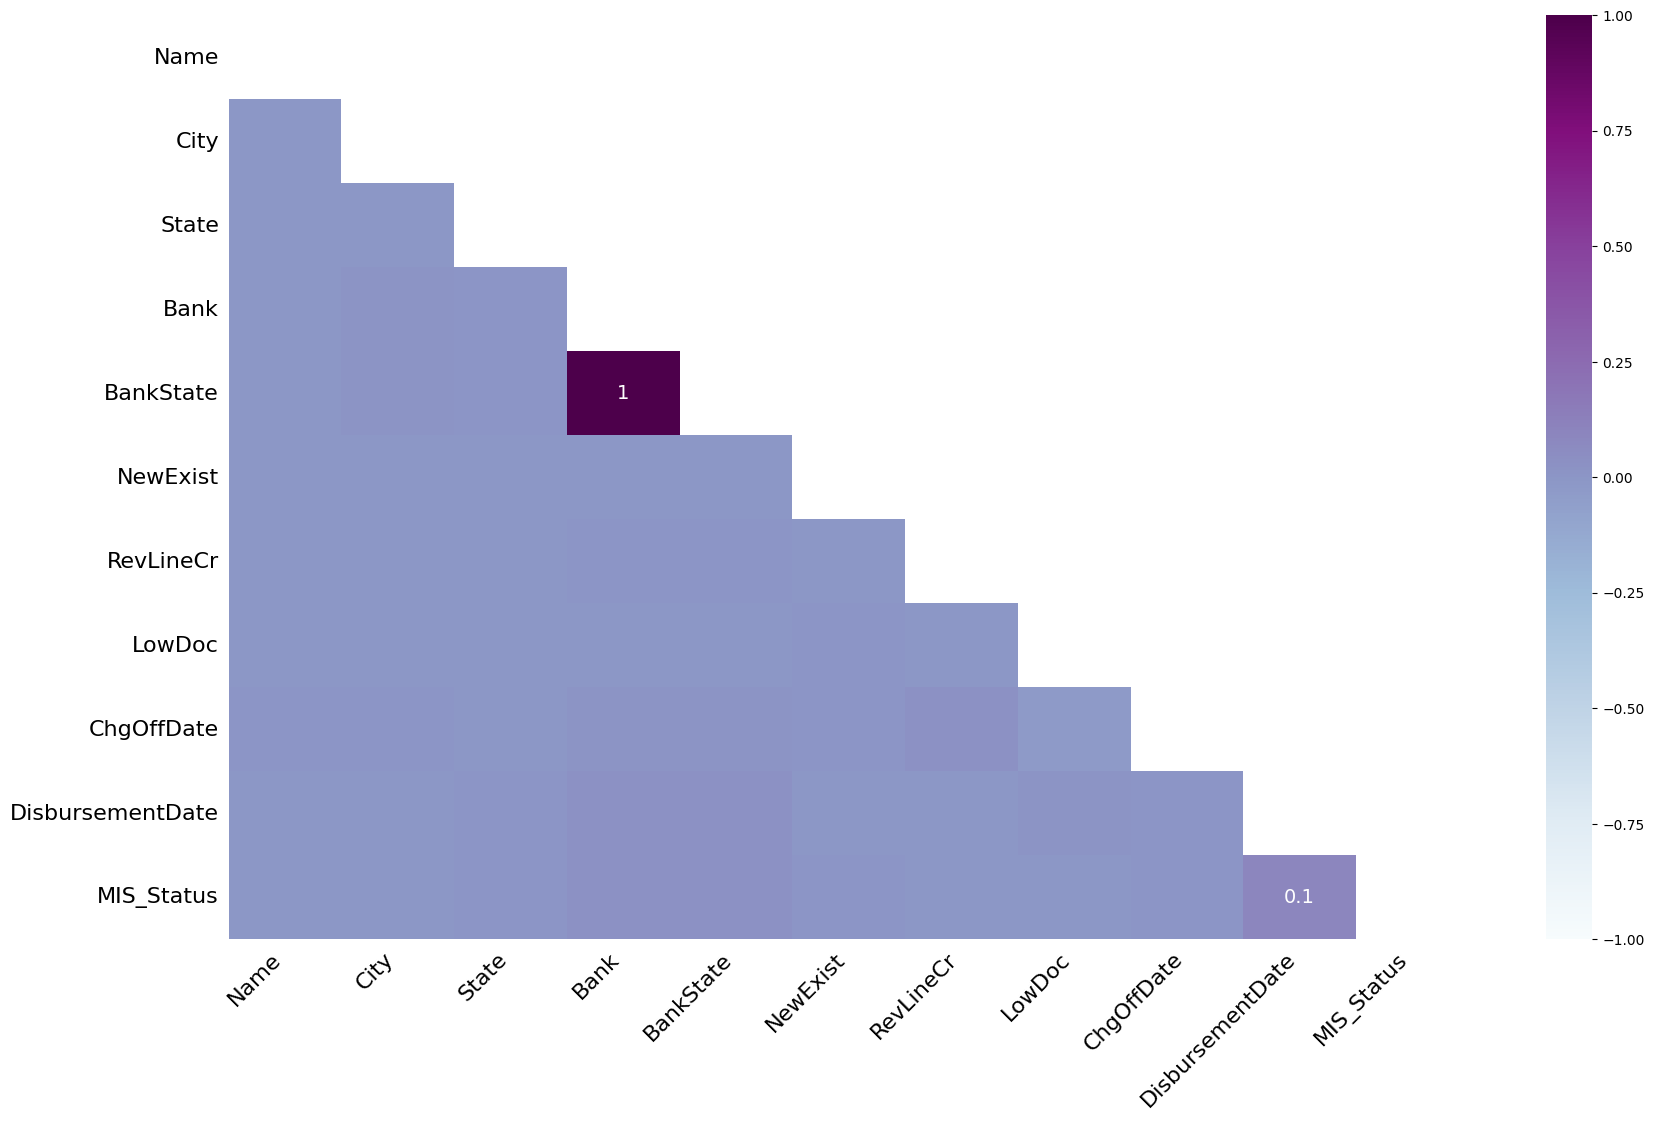

In [50]:
msno.heatmap(df, cmap="BuPu")


In [51]:
df= df.drop_duplicates()

In [52]:
df.corr()

/tmp/ipykernel_96423/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
LoanNr_ChkDgt,1.000000,0.027956,-0.060822,0.099793,0.009032,-0.040024,-0.022095,-0.023463,0.046296,-0.148337
Zip,0.027956,1.000000,-0.034026,0.146074,0.014157,-0.038853,0.003632,0.003674,0.011398,-0.072798
NAICS,-0.060822,-0.034026,1.000000,-0.111024,-0.038237,0.047053,-0.039376,-0.036587,0.027800,0.436724
Term,0.099793,0.146074,-0.111024,1.000000,0.046140,-0.073100,0.027581,0.024931,0.028940,-0.204080
NoEmp,0.009032,0.014157,-0.038237,0.046140,1.000000,-0.040222,0.008626,0.015350,0.006376,-0.041824
NewExist,-0.040024,-0.038853,0.047053,-0.073100,-0.040222,1.000000,-0.002130,-0.009128,0.124152,0.031701
CreateJob,-0.022095,0.003632,-0.039376,0.027581,0.008626,-0.002130,1.000000,0.993953,0.001038,-0.029924
RetainedJob,-0.023463,0.003674,-0.036587,0.024931,0.015350,-0.009128,0.993953,1.000000,-0.000515,-0.024851
FranchiseCode,0.046296,0.011398,0.027800,0.028940,0.006376,0.124152,0.001038,-0.000515,1.000000,-0.003776
UrbanRural,-0.148337,-0.072798,0.436724,-0.204080,-0.041824,0.031701,-0.029924,-0.024851,-0.003776,1.000000


In [53]:
df["MIS_Status"]

0          P I F
1          P I F
2          P I F
3          P I F
4          P I F
           ...  
899159     P I F
899160     P I F
899161     P I F
899162    CHGOFF
899163     P I F
Name: MIS_Status, Length: 899164, dtype: object

In [54]:
df['MIS_Status'] = df['MIS_Status'].apply(lambda x: 1 if x == 'CHGOFF' else 0)



In [55]:
df['MIS_Status']

0         0
1         0
2         0
3         0
4         0
         ..
899159    0
899160    0
899161    0
899162    1
899163    0
Name: MIS_Status, Length: 899164, dtype: int64

In [56]:
corr = df.corr()


/tmp/ipykernel_96423/361440739.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [57]:
import numpy as np

In [58]:
# Compute the correlation matrix
corr = df.corr()

# Get the absolute values of the correlation matrix
corr_abs = np.abs(corr)

# Sort the correlation matrix by the absolute values of the "mis_status" column
corr_mis_status_abs = corr_abs.sort_values(by='MIS_Status', ascending=False)

# Select the columns to keep
columns_to_keep = corr_mis_status_abs.index

# Create a new DataFrame with the sorted columns
df_sorted = df[columns_to_keep]




/tmp/ipykernel_96423/2782671225.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

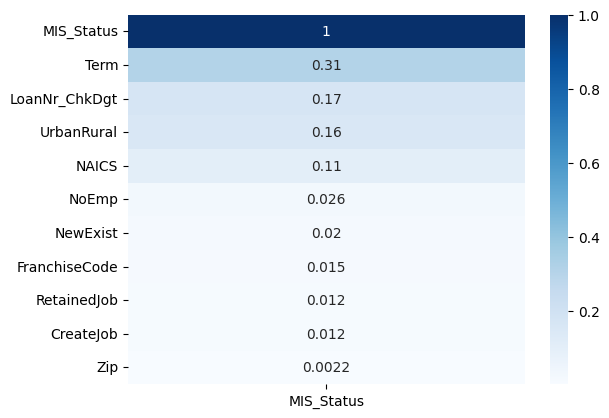

In [59]:
sns.heatmap(corr_mis_status_abs[["MIS_Status"]],annot = True,cmap = "Blues")

In [60]:
df1 = df

In [61]:
df = df[["NAICS","NoEmp","NewExist","CreateJob","RetainedJob","FranchiseCode","UrbanRural","MIS_Status","Term"]]

In [62]:
corr = df.corr()

In [63]:
""" sns.heatmap(df) """

' sns.heatmap(df) '

<AxesSubplot: >

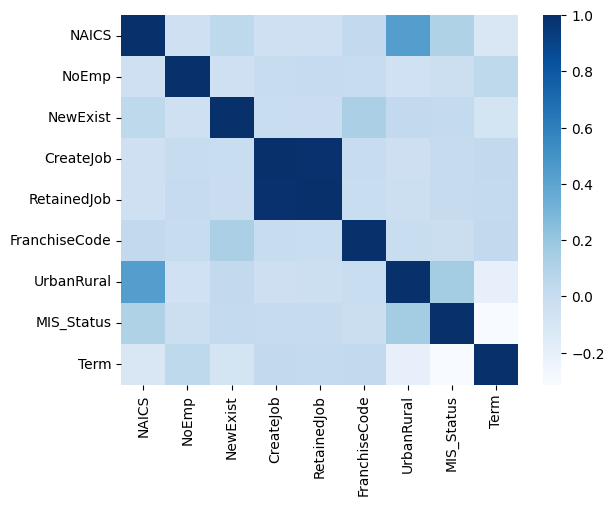

In [64]:
sns.heatmap(corr,cmap = "Blues")

In [65]:
""" sns.histplot(x="RetainedJob",data=df,kde=True)
plt.xlim(0,25)
plt.ylim = (0,100000) """

' sns.histplot(x="RetainedJob",data=df,kde=True)\nplt.xlim(0,25)\nplt.ylim = (0,100000) '

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899164 entries, 0 to 899163
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   NAICS          899164 non-null  int64  
 1   NoEmp          899164 non-null  int64  
 2   NewExist       899028 non-null  float64
 3   CreateJob      899164 non-null  int64  
 4   RetainedJob    899164 non-null  int64  
 5   FranchiseCode  899164 non-null  int64  
 6   UrbanRural     899164 non-null  int64  
 7   MIS_Status     899164 non-null  int64  
 8   Term           899164 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 68.6 MB


<AxesSubplot: >

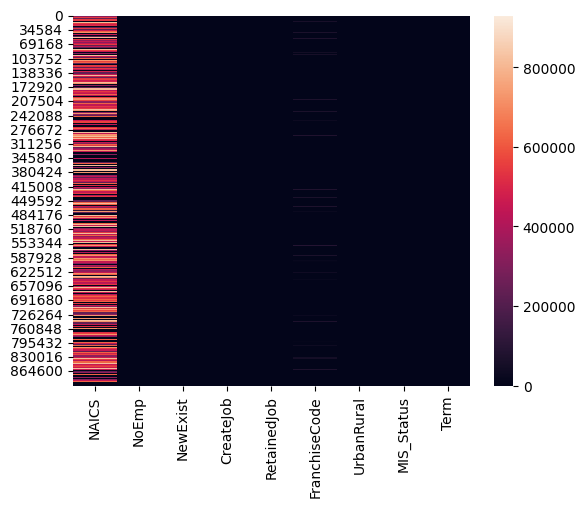

In [67]:
""" sns.heatmap(df) """

Commencez par voir les valeurs de Franchise code et drop les ligne en NAN dessus

In [68]:
df["FranchiseCode"].nunique()

2768

supposons on veuille juste savoir si l'entreprise a une franchise 

In [69]:
import pandas as pd

#Suppose your dataframe is named 'df'
df['FranchiseCode'] = df['FranchiseCode'].apply(lambda x: 0 if x == 0 or x ==1 else 1)


/tmp/ipykernel_96423/4023869984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FranchiseCode'] = df['FranchiseCode'].apply(lambda x: 0 if x == 0 or x ==1 else 1)


In [70]:
df["FranchiseCode"]

0         0
1         0
2         0
3         0
4         0
         ..
899159    0
899160    0
899161    0
899162    0
899163    0
Name: FranchiseCode, Length: 899164, dtype: int64

In [71]:
df["FranchiseCode"].sum()

51775

In [72]:
from pandas_profiling import ProfileReport

In [73]:
""" profile = ProfileReport(df, title="Pandas Profiling Report") """

' profile = ProfileReport(df, title="Pandas Profiling Report") '

In [74]:
""" profile.to_widgets() """

' profile.to_widgets() '

In [75]:
""" profile.to_notebook_iframe() """

' profile.to_notebook_iframe() '

In [76]:
""" sns.heatmap(df.isna()) """

' sns.heatmap(df.isna()) '

In [77]:
df.columns

Index(['NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'MIS_Status', 'Term'],
      dtype='object')

In [78]:
df = df[['NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'MIS_Status',"Term"]]

In [79]:
df = df[df['NewExist'] != 0.0]

In [80]:
df["NewExist"].unique()

array([ 2.,  1., nan])

In [81]:
df=df.dropna(axis=0)

In [82]:
df["NewExist"].dtypes

dtype('float64')

In [83]:
df["NewExist"] = df["NewExist"].apply(lambda x:x-1)

In [84]:
df = df.dropna().reset_index(drop=True)

In [85]:
df["UrbanRural"].unique()

array([0, 1, 2])

In [86]:
df.to_csv("df_analyse.")

In [87]:
df1

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,0,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,0,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,0,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,0,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,0,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,0,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,0,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,0,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,1,"$46,383.00","$75,000.00","$60,000.00"


In [88]:
""" df1['GrAppv'] = df1['GrAppv'].str.strip("$")
df1['GrAppv'] = df1['GrAppv'].replace(',', '', regex=True)
df1['GrAppv'] = df1['GrAppv'].astype(float) """


' df1[\'GrAppv\'] = df1[\'GrAppv\'].str.strip("$")\ndf1[\'GrAppv\'] = df1[\'GrAppv\'].replace(\',\', \'\', regex=True)\ndf1[\'GrAppv\'] = df1[\'GrAppv\'].astype(float) '

In [89]:
""" df1["ApprovalFY"] = df1["ApprovalFY"].replace('1976A',"1976")
df1["ApprovalFY"] = df1["ApprovalFY"].apply(int) """

' df1["ApprovalFY"] = df1["ApprovalFY"].replace(\'1976A\',"1976")\ndf1["ApprovalFY"] = df1["ApprovalFY"].apply(int) '